In [ ]:
import tensorflow as tf



In [111]:
import random
train_x = [[random.randint(0,1000)/1000.0,random.randint(0,1000)/1000.0] for i in range(100)]
# train_y = [[train_x[i][0]*2-train_x[i][1]+train_x[i-1][1]-train_x[i-1][0]] for i in range(100)]
train_y = [[train_x[i][0]] for i in range(100)]

In [112]:
zip(train_x, train_y)

[([0.405, 0.975], [0.405]),
 ([0.317, 0.791], [0.317]),
 ([0.981, 0.288], [0.981]),
 ([0.709, 0.801], [0.709]),
 ([0.615, 0.919], [0.615]),
 ([0.08, 0.398], [0.08]),
 ([0.598, 0.336], [0.598]),
 ([0.522, 0.695], [0.522]),
 ([0.898, 0.805], [0.898]),
 ([0.046, 0.074], [0.046]),
 ([0.867, 0.24], [0.867]),
 ([0.1, 0.45], [0.1]),
 ([0.465, 0.033], [0.465]),
 ([0.551, 0.418], [0.551]),
 ([0.826, 0.319], [0.826]),
 ([0.691, 0.888], [0.691]),
 ([0.695, 0.182], [0.695]),
 ([0.887, 0.355], [0.887]),
 ([0.253, 0.022], [0.253]),
 ([0.206, 0.904], [0.206]),
 ([0.882, 0.354], [0.882]),
 ([0.625, 0.44], [0.625]),
 ([0.561, 0.734], [0.561]),
 ([0.031, 0.74], [0.031]),
 ([0.999, 0.469], [0.999]),
 ([0.405, 0.431], [0.405]),
 ([0.447, 0.599], [0.447]),
 ([0.9, 0.085], [0.9]),
 ([0.102, 0.995], [0.102]),
 ([0.967, 0.851], [0.967]),
 ([0.246, 0.168], [0.246]),
 ([0.631, 0.165], [0.631]),
 ([0.737, 0.194], [0.737]),
 ([0.942, 0.217], [0.942]),
 ([0.949, 0.74], [0.949]),
 ([0.31, 0.157], [0.31]),
 ([0.182,

In [113]:
import numpy as np
x=np.array(x)
y=np.array(y)

In [120]:

# Training Parameters
learning_rate = 0.001
training_steps = 1000
#batch_size = 128
display_step = 200

# Network Parameters
num_input = 2 # MNIST data input (img shape: 28*28)
timesteps = 100 # timesteps
num_hidden = 20 # hidden layer num of features
num_output= 1
#num_classes = 10 # MNIST total classes (0-9 digits)

In [115]:
from tensorflow.contrib import rnn



In [127]:

graph = tf.Graph()
with graph.as_default(), tf.device('/cpu:0'):
    # tf Graph input
    X = tf.placeholder("float", [None, timesteps, num_input])
    Y = tf.placeholder("float", [None, timesteps, num_output])
    
    # Define weights
    weights = {
        'out': tf.Variable(tf.random_normal([num_hidden, num_output,1]))
    }
    biases = {
        'out':tf.Variable(tf.constant(0.1,shape=[1,]))
    }
    
    def RNN(x, weights, biases):
        x = tf.unstack(x, timesteps, 1)
        lstm_cell = rnn.BasicLSTMCell(num_hidden, forget_bias=1.0)
        outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)
#         outputs = tf.stack(outputs)
#         ret = tf.matmul(outputs, weights['out'])
        ret=[]
        for op in outputs:
            ret.append(tf.matmul(op, weights['out']) + biases['out'])
        return ret
    
    logits = RNN(X, weights, biases)
    loss = tf.reduce_mean(tf.squared_difference(logits, Y))
    optimizer = tf.train.AdagradOptimizer(learning_rate = 0.5).minimize(loss)

ValueError: Shape must be rank 2 but is rank 3 for 'MatMul' (op: 'MatMul') with input shapes: [?,20], [20,1,1].

In [117]:
with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    print('Initialized')
    for step in range(training_steps):
        feed_dict = {X: train_x, Y: train_y}
        _, l, predictions = session.run([optimizer, loss, logits],feed_dict = feed_dict)
        if (step % 100 == 0):
            print('Loss at step %d: %f' % (step, l))
            
#     print("Testing Accuracy:",
#     session.run(accuracy, feed_dict={inputs: test_x, labels: test_y}))

Initialized
Loss at step 0: 0.523979
Loss at step 100: 0.087275
Loss at step 200: 0.086878
Loss at step 300: 0.086784
Loss at step 400: 0.086758
Loss at step 500: 0.086748
Loss at step 600: 0.086741
Loss at step 700: 0.086736
Loss at step 800: 0.086732
Loss at step 900: 0.086728
Loss at step 1000: 0.086725
Loss at step 1100: 0.086722
Loss at step 1200: 0.086719
Loss at step 1300: 0.086717
Loss at step 1400: 0.086715
Loss at step 1500: 0.086712
Loss at step 1600: 0.086710
Loss at step 1700: 0.086709
Loss at step 1800: 0.086707
Loss at step 1900: 0.086705
Loss at step 2000: 0.086704
Loss at step 2100: 0.086702
Loss at step 2200: 0.086701
Loss at step 2300: 0.086699
Loss at step 2400: 0.086698
Loss at step 2500: 0.086697
Loss at step 2600: 0.086696
Loss at step 2700: 0.086695
Loss at step 2800: 0.086694
Loss at step 2900: 0.086693
Loss at step 3000: 0.086691
Loss at step 3100: 0.086690
Loss at step 3200: 0.086690
Loss at step 3300: 0.086689
Loss at step 3400: 0.086688
Loss at step 3500: 0

KeyboardInterrupt: 

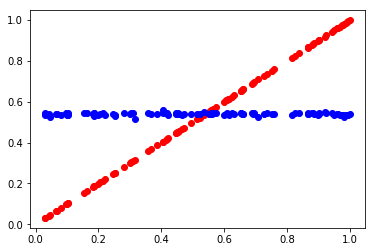

In [119]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  
  
# x,y=np.mgrid[-2:2:20j,-2:2:20j]  
# z=x*np.exp(-x**2-y**2)  
# x=[i[0] for i in train_x]
# y=[i[1] for i in train_x]
# z=[i[0] for i in predictions]

# ax=plt.subplot(111,projection='3d')  
# ax.plot_surface(x,y,z,rstride=2,cstride=1,cmap=plt.cm.coolwarm,alpha=0.8)  
# ax.set_xlabel('x')  
# ax.set_ylabel('y')  
# ax.set_zlabel('z')  
 
# plt.show()  

plt.plot([i[0] for i in train_x], [i[0] for i in train_y], 'ro')
plt.plot([i[0] for i in train_x], [i[0] for i in predictions], 'bo')
plt.show()